## Importing the Libraries

In [ ]:
pip install scikit-learn==1.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
pip show scikit-learn

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import missingno as msno
import nltk

import warnings   #Warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

print("Libraries Imported")

Libraries Imported


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING='ISO-8859-1'
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/training.1600000.processed.noemoticon.csv",
                encoding = DATASET_ENCODING,names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
899146,4,1693767445,Sun May 03 23:42:22 PDT 2009,NO_QUERY,pripper,@iijoanna thanks
1319683,4,2014501545,Wed Jun 03 01:44:44 PDT 2009,NO_QUERY,0summerbreeze0,@raydiorable that actually may be a great idea
584104,0,2215158507,Wed Jun 17 17:45:25 PDT 2009,NO_QUERY,Tamraj04,Don't have time to read through all the tweets...
1118786,4,1973657129,Sat May 30 11:34:43 PDT 2009,NO_QUERY,HotDominatrix,"This lady is a Hot Mature brunette MILF , Her ..."
961785,4,1827150397,Sun May 17 10:05:57 PDT 2009,NO_QUERY,syntheticjesso,@jchutchins That really was a great birthday p...


In [ ]:
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [ ]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

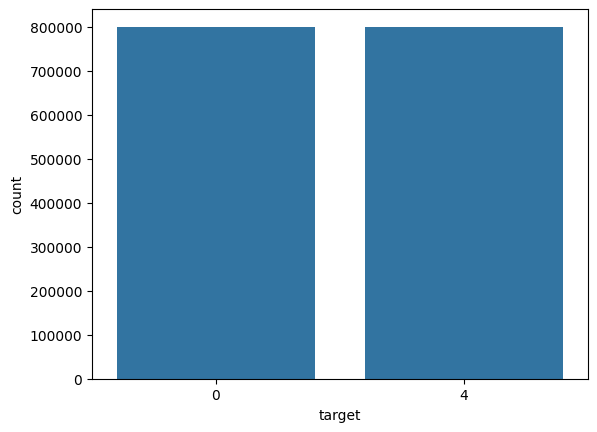

In [ ]:
import seaborn as sns
sns.countplot(data=df,x='target')

In [ ]:
data = df[['text','target']]

* Changing **4 to 1** to make it easy for modelling
* Dataset contains 32000 negative tweets and 29830 positive tweets
* 0 being negative and 1 being positive
* There are 6 features in total, this notebook only considers the tweet for Analysis

## Null values and Duplicates

In [ ]:
data.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


### Remove usernames and URL's

In [ ]:
data['target']=data['target'].replace(4,1)
data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

In [ ]:
data_pos = data[data['target']==1]
data_neg = data[data['target']==0]

data_pos = data_pos.iloc[:int(25000)]
data_neg = data_neg.iloc[:int(25000)]

dataset = pd.concat([data_pos,data_neg])
dataset.shape

(50000, 2)

In [ ]:
dataset.head()

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1


In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves'.'not']

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000              I LOVE @Health4UandPets u guys r best!!
800001    im meeting one besties tonight! Cant wait!! - ...
800002    @DaRealSunisaKim Thanks Twitter add, Sunisa! I...
800003    Being sick really cheap hurts much eat real fo...
800004                      @LovesBrooklyn2 effect everyone
Name: text, dtype: object

### Converting common emoticons to their appropriate sentiment

In [ ]:
def smiley(a):
    x1=a.replace(":‑)","happy")
    x2=x1.replace(";)","happy")
    x3=x2.replace(":-}","happy")
    x4=x3.replace(":)","happy")
    x5=x4.replace(":}","happy")
    x6=x5.replace("=]","happy")
    x7=x6.replace("=)","happy")
    x8=x7.replace(":D","happy")
    x9=x8.replace("xD","happy")
    x10=x9.replace("XD","happy")
    x11=x10.replace(":‑(","sad")    #using 'replace' to convert emoticons
    x12=x11.replace(":‑[","sad")
    x13=x12.replace(":(","sad")
    x14=x13.replace("=(","sad")
    x15=x14.replace("=/","sad")
    x16=x15.replace(":[","sad")
    x17=x16.replace(":{","sad")

    x18=x17.replace(":P","playful")
    x19=x18.replace("XP","playful")
    x20=x19.replace("xp","playful")


    x21=x20.replace("<3","love")
    x22=x21.replace(":o","shock")
    x23=x22.replace(":-/","sad")
    x24=x23.replace(":/","sad")
    x25=x24.replace(":|","sad")
    return x25

In [ ]:
data['text']=data['text'].apply(smiley)

In [ ]:

slang_dict = {
    "bae": "Before Anyone Else",
    "bb": "Bareback",
    "bff": "Best Friends Forever",
    "brb": "Be Right Back",
    "btw": "By The Way",
    "bump": "Bring Up My Post",
    "cba": "Can't Be Arsed",
    "ciao": "Goodbye",
    "cu": "See You",
    "dank": "High-Quality Marijuana",
    "dawg": "Close Friend",
    "dm": "Direct Message",
    "dope": "Cool, Awesome",
    "eod": "End Of Discussion",
    "fam": "Family",
    "fbo": "Facebook Official",
    "ffs": "For Fuck's Sake",
    "fomo": "Fear Of Missing Out",
    "fml": "Fuck My Life",
    "foodie": "A Person Who Loves Food",
    "ftfy": "Fixed That For You",
    "ftw": "For The Win",
    "fwiw": "For What It's Worth",
    "gfy": "Go Fuck Yourself",
    "gg": "Good Game",
    "gotcha": "I Understand",
    "gr8": "Great",
    "gtg": "Got To Go",
    "hbu": "How About You?",
    "icymi": "In Case You Missed It",
    "idgaf": "I Don't Give A Fuck",
    "idk": "I Don't Know",
    "ikr": "I Know, Right?",
    "imho": "In My Humble Opinion",
    "irl": "In Real Life",
    "iso": "In Search Of",
    "jelly": "Jealous",
    "jk": "Just Kidding",
    "k": "Okay",
    "kms": "Kill Myself",
    "lit": "Awesome",
    "lmao": "Laughing My Ass Off",
    "lmk": "Let Me Know",
    "lol": "Laughing Out Loud",
    "mcm": "Man Crush Monday",
    "mfw": "My Face When",
    "ngl": "Not Gonna Lie",
    "nm": "Never Mind",
    "noob": "Newbie",
    "nsfw": "Not Safe For Work",
    "nvm": "Never Mind",
    "obvi": "Obviously",
    "og": "Original Gangster",
    "omg": "Oh My God",
    "ootd": "Outfit Of The Day",
    "op": "Original Poster",
    "otw": "On The Way",
    "ppl": "People",
    "probs": "Probably",
    "rofl": "Rolling On The Floor Laughing",
    "smh": "Shaking My Head",
    "tbh": "To Be Honest",
    "tbt": "Throwback Thursday",
    "tgif": "Thank God It's Friday",
    "thot": "That Hoe Over There",
    "tl;dr": "Too Long; Didn't Read",
    "tmi": "Too Much Information",
    "ttyl": "Talk To You Later",
    "wbu": "What About You?",
    "wcw": "Woman Crush Wednesday",
    "wtf": "What The Fuck",
    "wyd": "What You Doing?"
}

In [ ]:
# Function to translate the message
def chat_words_conversion(text):
    return " ".join(slang_dict.get(word, word) for word in text.split())

# Apply the function to your text data
data['text'] = data['text'].apply(lambda x: chat_words_conversion(x))

### Converting all the tweets to lower case

In [ ]:
data['text']=data['text'].apply(lambda x: x.lower())

### Expanding Contractions

In [ ]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)   #using regular expressions to expand the contractions
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
data['text']=data['text'].apply(decontracted)

### Removing Digits

In [ ]:
data['text']=data['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

### Remove punctuations

In [ ]:
from string import punctuation
def clean_punctuations(text):
    translator = str.maketrans('', '', punctuation)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: clean_punctuations(x))
dataset['text'].tail()

24995                        sad raining no softball today
24996                                    Last day vacation
24997    Good Morning Its beautiful day bad Im gonna sp...
24998        night all love yas hahahahahah btw vodka evil
24999                              go back school tomorrow
Name: text, dtype: object

In [ ]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

24995                        sad raining no softball today
24996                                    Last day vacation
24997    Good Morning Its beautiful day bad Im gonna sp...
24998        night all love yas hahahahahah btw vodka evil
24999                              go back school tomorrow
Name: text, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

24995                        sad raining no softball today
24996                                    Last day vacation
24997    Good Morning Its beautiful day bad Im gonna sp...
24998        night all love yas hahahahahah btw vodka evil
24999                              go back school tomorrow
Name: text, dtype: object

### Cleaning other oddities that were found

In [ ]:
data["text"]=data["text"].apply(lambda x: re.sub(' +', ' ', x))

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

24995                        sad raining no softball today
24996                                    Last day vacation
24997    Good Morning Its beautiful day bad Im gonna sp...
24998        night all love yas hahahahahah btw vodka evil
24999                              go back school tomorrow
Name: text, dtype: object

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize
dataset['text'] = dataset['text'].apply(lambda text: sent_tokenize(text))

In [ ]:
dataset['text'].tail()

24995                      [sad raining no softball today]
24996                                  [Last day vacation]
24997    [Good Morning Its beautiful day bad Im gonna s...
24998      [night all love yas hahahahahah btw vodka evil]
24999                            [go back school tomorrow]
Name: text, dtype: object

In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000                [I LOVE HealthUandPets u guys r best]
800001    [im meeting one besties tonight Cant wait  GIR...
800002    [DaRealSunisaKim Thanks Twitter add Sunisa I g...
800003    [Being sick really cheap hurts much eat real f...
800004                      [LovesBrooklyn effect everyone]
Name: text, dtype: object

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
dataset.head()

,text,target
800000,[I LOVE HealthUandPets u guys r best],1
800001,[im meeting one besties tonight Cant wait GIR...,1
800002,[DaRealSunisaKim Thanks Twitter add Sunisa I g...,1
800003,[Being sick really cheap hurts much eat real f...,1
800004,[LovesBrooklyn effect everyone],1


## Visualization

In [ ]:
data["word_count"] = data['text'].apply(lambda x: len(str(x).split()))

<Axes: xlabel='word_count'>

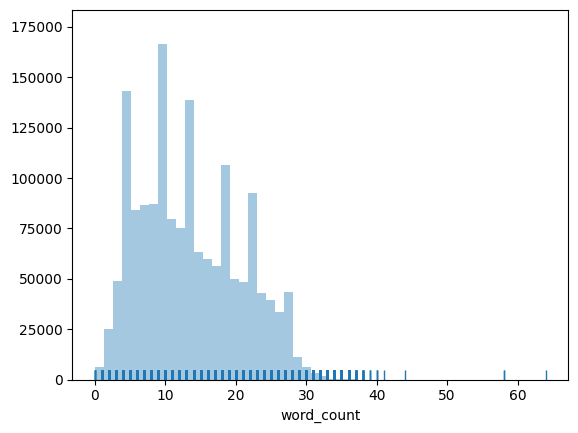

In [ ]:
sns.distplot(data.word_count, kde=False, rug=True)

- The  plot gives the distribution of length of words in a tweet
- There are more tweets around the length 6
- And the least are of length 30+

In [ ]:
data.drop("word_count", axis=1, inplace=True)

(-0.5, 1599.5, 799.5, -0.5)

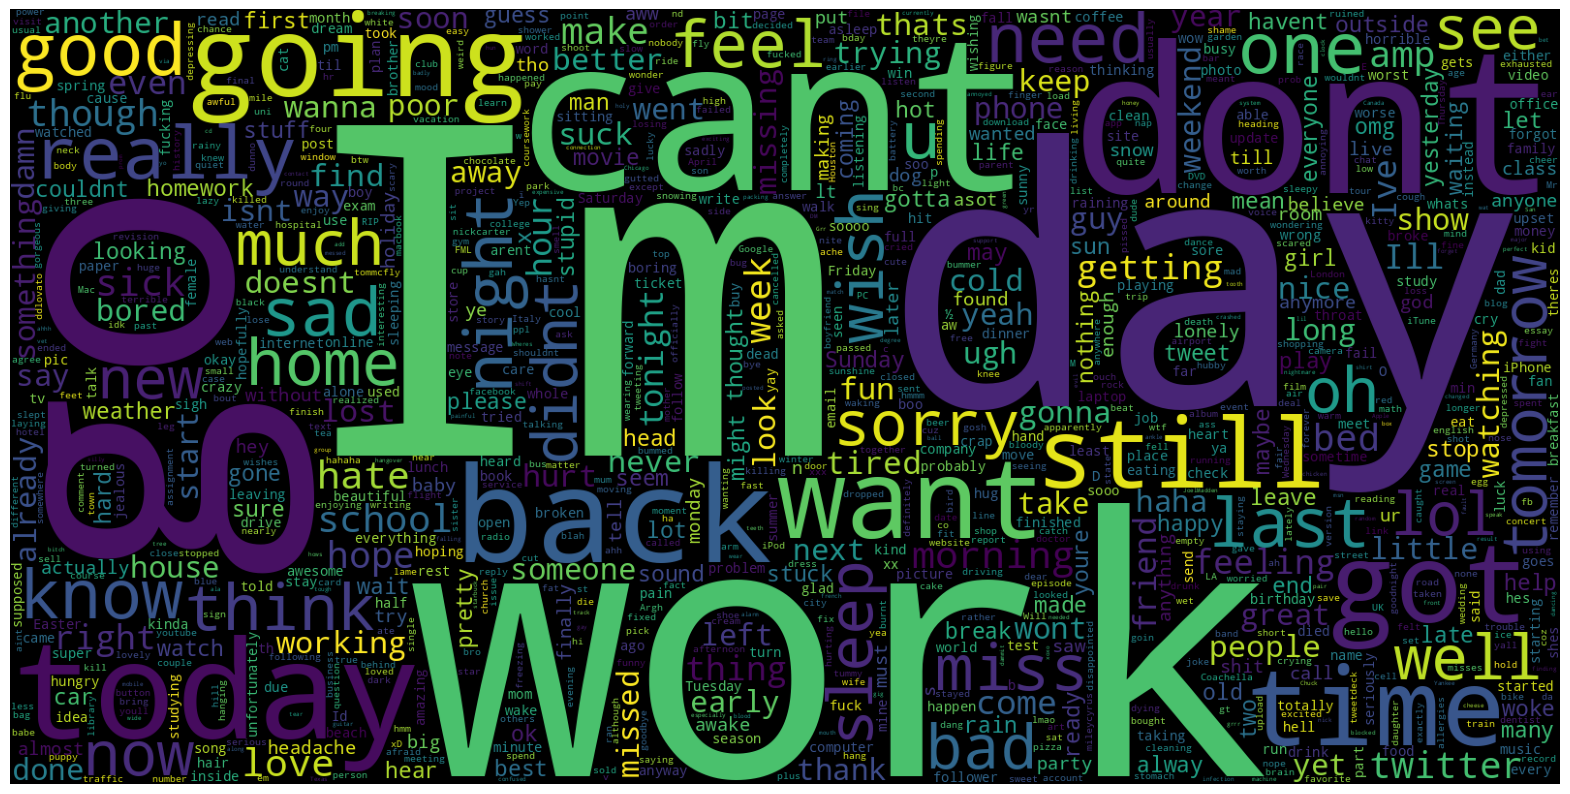

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
data_neg = dataset[dataset['target']==0]['text'].apply(lambda x: ' '.join(x) )
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

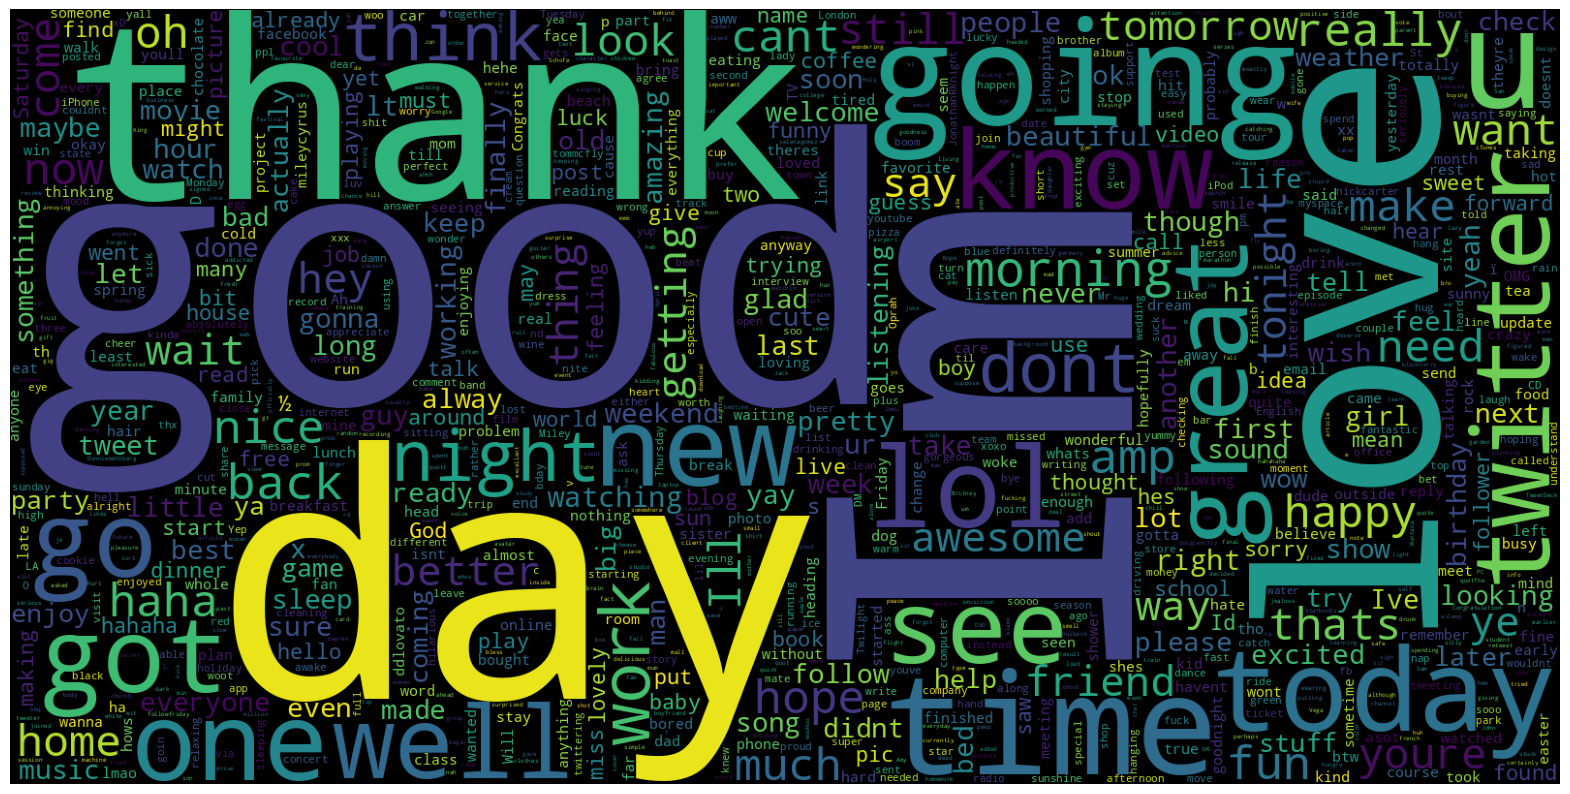

In [ ]:
data_pos = dataset[dataset['target']==1]['text'].apply(lambda x: ' '.join(x) )
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)
plt.axis('off')

In [ ]:
new_data=dataset
new_data['text'] = dataset['text'].apply(lambda x: ' '.join(x) )
new_data.head()

,text,target
800000,I LOVE HealthUandPets u guys r best,1
800001,im meeting one besties tonight Cant wait GIRL...,1
800002,DaRealSunisaKim Thanks Twitter add Sunisa I go...,1
800003,Being sick really cheap hurts much eat real fo...,1
800004,LovesBrooklyn effect everyone,1


## Splitting and Transformation

In [ ]:
X=new_data.text
y=new_data.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,
                                                    random_state =0,stratify = y)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(50000,)
(40000,)
(10000,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  5000


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(40000, 5000)
(10000, 5000)


In [ ]:
y_train.shape

(40000,)

In [ ]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
train_pred=clf.predict(X_train)

In [ ]:
y_pred.shape

(10000,)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
train_acc=accuracy_score(y_train,train_pred)
test_acc=accuracy_score(y_test,y_pred)
print(train_acc)
print(test_acc)
cfm1=confusion_matrix(y_train,train_pred)
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print(cfm1)

0.93105
0.7747
[[3743 1257]
 [ 996 4004]]
[[18508  1492]
 [ 1266 18734]]


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions
logistic_train_pred = logistic_model.predict(X_train)
logistic_test_pred = logistic_model.predict(X_test)

# Evaluate
logistic_train_acc = accuracy_score(y_train, logistic_train_pred)
logistic_test_acc = accuracy_score(y_test, logistic_test_pred)
print("Logistic Regression Train Accuracy:", logistic_train_acc)
print("Logistic Regression Test Accuracy:", logistic_test_acc)

# Confusion Matrix
logistic_train_cfm = confusion_matrix(y_train, logistic_train_pred)
logistic_test_cfm = confusion_matrix(y_test, logistic_test_pred)


Logistic Regression Train Accuracy: 0.81005
Logistic Regression Test Accuracy: 0.7715


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create and train the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
nb_train_pred = nb_model.predict(X_train)
nb_test_pred = nb_model.predict(X_test)

# Evaluate
nb_train_acc = accuracy_score(y_train, nb_train_pred)
nb_test_acc = accuracy_score(y_test, nb_test_pred)
print("Naive Bayes Train Accuracy:", nb_train_acc)
print("Naive Bayes Test Accuracy:", nb_test_acc)

# Confusion Matrix
nb_train_cfm = confusion_matrix(y_train, nb_train_pred)
nb_test_cfm = confusion_matrix(y_test, nb_test_pred)


Naive Bayes Train Accuracy: 0.7923
Naive Bayes Test Accuracy: 0.7552


In [ ]:
pip install prettytable

In [ ]:
from prettytable import PrettyTable

# Create a table
accuracy_table = PrettyTable()

# Define table columns
accuracy_table.field_names = ["Model", "Train Accuracy", "Test Accuracy"]

# Add data to the table
accuracy_table.add_row(["SVM", train_acc, test_acc])
accuracy_table.add_row(["Logistic Regression", logistic_train_acc, logistic_test_acc])
accuracy_table.add_row(["Naive Bayes", nb_train_acc, nb_test_acc])

# Print the table
print(accuracy_table)


+---------------------+----------------+---------------+
|        Model        | Train Accuracy | Test Accuracy |
+---------------------+----------------+---------------+
|         SVM         |    0.93105     |     0.7747    |
| Logistic Regression |    0.81005     |     0.7715    |
|     Naive Bayes     |     0.7923     |     0.7552    |
+---------------------+----------------+---------------+


In [ ]:
# Example tweets
tweets = [
    "i will recommend this product to you",
    "This product is terrible. I regret buying it.",
    "Today was a great day!",
    "I'm feeling :(",
    "The weather is awful.",
]

# Preprocess the tweets
processed_tweets = [cleaning_stopwords(smiley(decontracted(tweet.lower()))) for tweet in tweets]
processed_tweets = [re.sub('\w*\d\w*','', tweet) for tweet in processed_tweets]
processed_tweets = [clean_punctuations(tweet) for tweet in processed_tweets]
processed_tweets = [cleaning_repeating_char(tweet) for tweet in processed_tweets]
processed_tweets = [cleaning_URLs(tweet) for tweet in processed_tweets]
processed_tweets = [cleaning_numbers(tweet) for tweet in processed_tweets]
processed_tweets = [' '.join(sent_tokenize(tweet)) for tweet in processed_tweets]
processed_tweets = [stemming_on_text(tweet) for tweet in processed_tweets]

# Transform the preprocessed tweets using the TfidfVectorizer
processed_tweets_vectorized = vectoriser.transform(processed_tweets)

# Predict sentiment using the trained SVM model
sentiment_predictions = clf.predict(processed_tweets_vectorized)

# Display the predictions
for tweet, prediction in zip(tweets, sentiment_predictions):
    print("Tweet:", tweet)
    print("Predicted Sentiment:", "Positive" if prediction == 1 else "Negative")
    print()


Tweet: i will recommend this product to you
Predicted Sentiment: Positive

Tweet: This product is terrible. I regret buying it.
Predicted Sentiment: Negative

Tweet: Today was a great day!
Predicted Sentiment: Positive

Tweet: I'm feeling :(
Predicted Sentiment: Negative

Tweet: The weather is awful.
Predicted Sentiment: Negative



In [ ]:
from joblib import dump

# Specify the file path to save the model
model_file = 'svm_model.joblib'
vectoriser_file = 'vectoriser.joblib'
# Save the model to disk
dump(clf, model_file)
dump(vectoriser, vectoriser_file)

['vectoriser.joblib']

In [ ]:

from joblib import load

# Specify the file path to the saved model
model_file_path = 'svm_model.joblib'
# Load the model from disk
loaded_model = load(model_file_path)
vectoriser_file_path = 'vectoriser.joblib'
loaded_vectoriser = load(vectoriser_file_path)



In [ ]:
# Preprocess new tweets
new_tweets = ["Feeling :) today", "Feeling:(  "]

processed_new_tweets = [cleaning_stopwords(smiley(decontracted(tweet.lower()))) for tweet in new_tweets]
processed_new_tweets = [re.sub('\w*\d\w*','', tweet) for tweet in processed_new_tweets]
processed_new_tweets = [clean_punctuations(tweet) for tweet in processed_new_tweets]
processed_new_tweets = [cleaning_repeating_char(tweet) for tweet in processed_new_tweets]
processed_new_tweets = [cleaning_URLs(tweet) for tweet in processed_new_tweets]
processed_new_tweets = [cleaning_numbers(tweet) for tweet in processed_new_tweets]
processed_new_tweets = [' '.join(sent_tokenize(tweet)) for tweet in processed_new_tweets]
processed_new_tweets = [stemming_on_text(tweet) for tweet in processed_new_tweets]
processed_tweet = chat_words_conversion(processed_tweet)  # Convert chat words
processed_new_tweets.append(processed_tweet)

# Transform the preprocessed new tweets using the TfidfVectorizer
processed_new_tweets_vectorized = vectoriser.transform(processed_new_tweets)

# Predict sentiment using the loaded model
new_sentiment_predictions = loaded_model.predict(processed_new_tweets_vectorized)

# Display the predictions
for tweet, prediction in zip(new_tweets, new_sentiment_predictions):
    print("Tweet:", tweet)
    print("Predicted Sentiment:", "Positive" if prediction == 1 else "Negative")
    print()


Tweet: Feeling :) today
Predicted Sentiment: Positive

Tweet: FML  
Predicted Sentiment: Negative

